# Assignment No.18 (CocaCola)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import itertools
import warnings

In [66]:
Data = pd.read_excel(r"C:\Users\Admin\Desktop\data science csv files\CocaCola_Sales_Rawdata18.xlsx")

In [67]:
Data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [68]:
Data1 = Data.copy()

In [69]:
Data1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [70]:
Data1.dtypes

Quarter     object
Sales      float64
dtype: object

In [71]:
Data1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [72]:
Data1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [73]:
temp = Data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
Data1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
Data1.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_16336/3947603745.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = Data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [74]:
Data1 = Data1.drop(['Quarter'], axis=1)
Data1.reset_index(inplace=True)
Data1['quater'] = pd.to_datetime(Data1['quater'])
Data1 = Data1.set_index('quater')

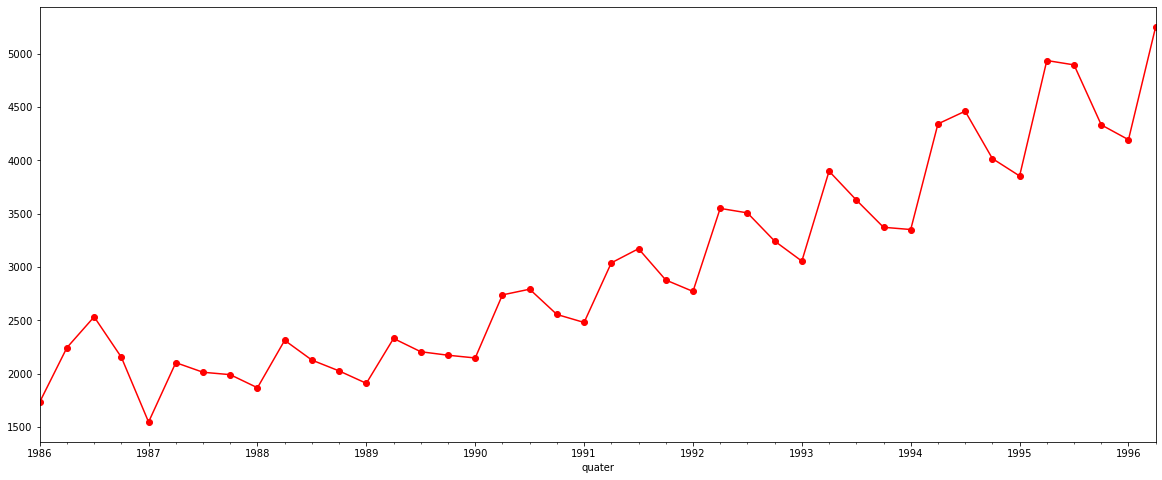

In [75]:
Data1['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

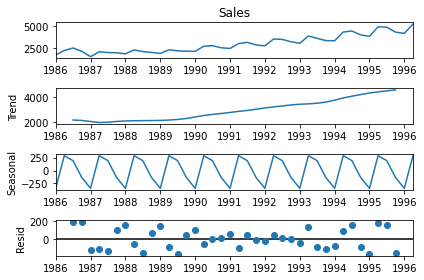

In [76]:
ts_add = seasonal_decompose(Data1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

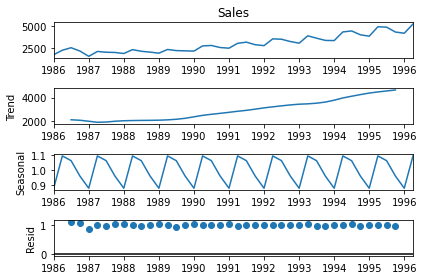

In [77]:
ts_mul = seasonal_decompose(Data1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

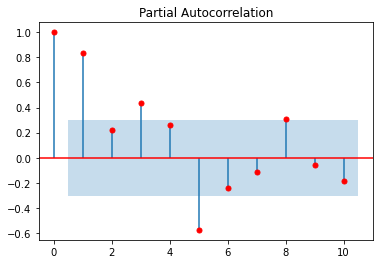

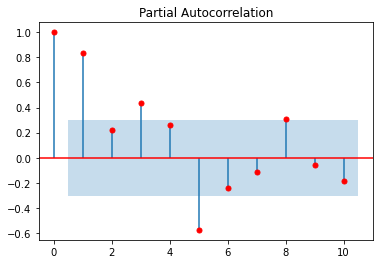

In [78]:
tsa_plots.plot_pacf(Data1.Sales, lags=10,color='red')

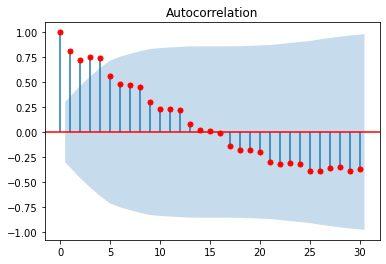

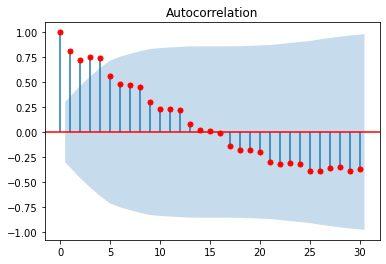

In [79]:
tsa_plots.plot_acf(Data1.Sales, lags=30,color='red')

In [80]:
x = Data1['Sales'].values

In [81]:
size = int(len(x) * 0.66)

In [82]:
train, test = x[0:size], x[size:len(x)]

In [88]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Thu, 19 Jan 2023   AIC                            360.163
Time:                        12:42:24   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

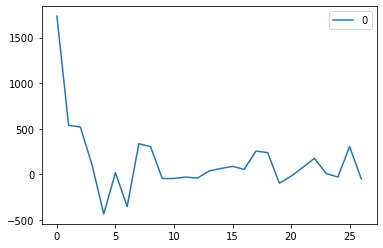

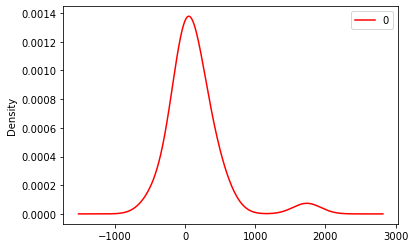

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938861
50%      55.067400
75%     247.080157
max    1734.827000


In [89]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

In [90]:
history = [x for x in train]

In [91]:
predictions = list()

In [92]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132570, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837495, expected=3629.000000
predicted=3332.727871, expected=3373.000000
predicted=3258.576338, expected=3352.000000
predicted=4081.006046, expected=4342.000000


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=3955.786233, expected=4461.000000
predicted=4146.277853, expected=4017.000000
predicted=3958.436761, expected=3854.000000
predicted=4701.652911, expected=4936.000000
predicted=4990.072284, expected=4895.000000
predicted=4390.352783, expected=4333.000000
predicted=4190.807855, expected=4194.000000
predicted=5176.909532, expected=5253.000000


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
model_fit = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
Data2 = pd.get_dummies(Data, columns = ['Quarter'])

In [98]:
Data2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [101]:
Data2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [102]:
a = np.arange(1,43)

In [104]:
Data2['a'] = a

In [107]:
Data2['T_sq'] = Data2['a']*Data2['a']

In [108]:
log_Sales=np.log(Data2['Sales'])

In [109]:
Data2['log_Sales']=log_Salesquadratic=smf.ols('Sales~W+T_sq',data=train_1).fit()
predquadratic=pd.Series(quadratic.predict(pd.DataFrame(test_1[['W','T_sq']])))
rmsequadratic=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquadratic))**2))
rmsequadratic
Data2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,a,T_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [119]:
train1, test1 = np.split(Data2, [int(.67 *len(Data2))])

Linear Model

In [120]:
linear= smf.ols('Sales ~ a',data=train1).fit()
predlinear=pd.Series(linear.predict(pd.DataFrame(test1['a'])))
rmselinear=np.sqrt((np.mean(np.array(test_1['Sales'])-np.array(predlinear))**2))
rmselinear

580.1224130918641

Quadratic Model

In [123]:
quadratic=smf.ols('Sales~a+T_sq',data=train_1).fit()
predquadratic=pd.Series(quadratic.predict(pd.DataFrame(test_1[['a','T_sq']])))
rmsequadratic=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquadratic))**2))
rmsequadratic

783.7297975037103

Expoential Model

In [125]:
expo=smf.ols('log_Sales~a',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['a'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900134

In [130]:
output = {'Model':pd.Series(['rmsequadratic','rmseexpo','rmselinear']),
          'Values':pd.Series([rmsequadratic,rmseexpo,rmselinear])}

In [134]:
rmse = pd.DataFrame(output) 
rmse

,Model,Values
0,rmsequadratic,783.729798
1,rmseexpo,588.140510
2,rmselinear,580.122413
